# Load DataSet

In [8]:
import numpy as np

!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
data = np.load('Data.npz')
print(data.files)

--2021-12-30 12:27:07--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18.81M  13.6MB/s    in 1.4s    

2021-12-30 12:27:10 (13.6 MB/s) - ‘Data.npz’ saved [19725078/19725078]

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


# Visualization

In [9]:
import numpy as np

x_train = data['train_images']
y_train = data['train_labels']

x_val = data['val_images']
y_val = data['val_labels']

x_test = data['test_images']
y_test = data['test_labels']

print('Labels: ', np.unique(y_train))
labels_number = len(np.unique(y_train))

print('train_images shape: ', data['train_images'].shape)
print('train_labels shape: ', data['train_labels'].shape)

print('val_images shape: ', data['val_images'].shape)
print('val_labels shape: ', data['val_labels'].shape)

print('test_images shape: ', data['test_images'].shape)
print('test_labels shape: ', data['test_labels'].shape)

Labels:  [0 1 2 3 4 5 6]
train_images shape:  (7007, 28, 28, 3)
train_labels shape:  (7007, 1)
val_images shape:  (1003, 28, 28, 3)
val_labels shape:  (1003, 1)
test_images shape:  (2005, 28, 28, 3)
test_labels shape:  (2005, 1)


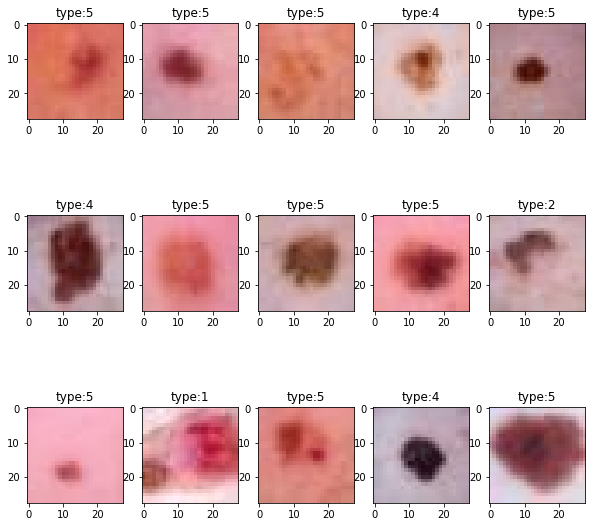

In [10]:
def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(10, 10))
    columns = 5
    rows = 3
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i]
        plt.imshow(img)
        plt.title('type:'+str(y_train[i][0]))
    plt.show()
plot_img(x_train, y_train)

# Unbalancment of data 

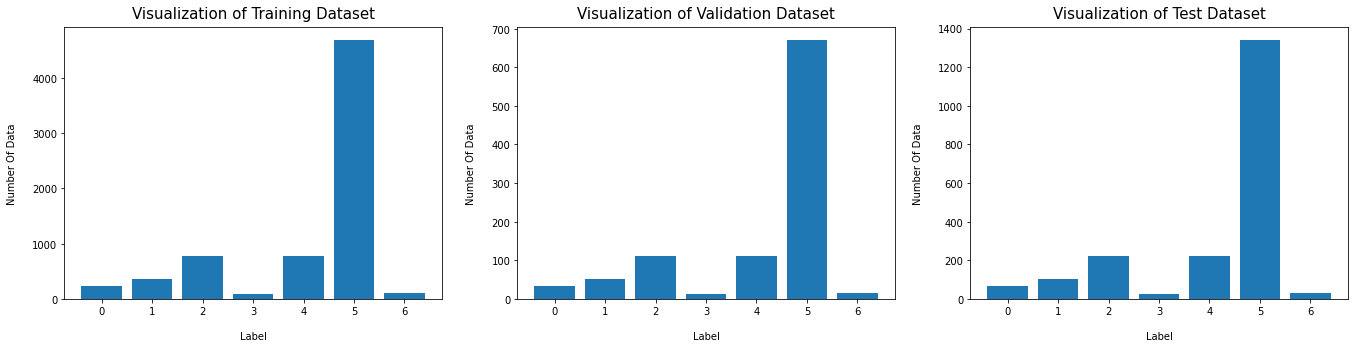

In [11]:
from matplotlib import pyplot as plt

def data_summary(y):
    data = dict()
    for i in range(labels_number):
        data[str(i)] = (int)(np.sum(y==i))
    group_data = list(data.values())
    group_names = list(data.keys())
    return group_data, group_names

def draw_ax(i, group_data, group_names, title):
    ax[i].bar(group_names, group_data)
    ax[i].set_title("Visualization of "+ title , y=1.01, fontsize=15)
    ax[i].set_ylabel("Number Of Data", labelpad=15)
    ax[i].set_xlabel("Label", labelpad=15)

fig, ax = plt.subplots(1, 3, figsize=(23, 5))

group_data, group_names = data_summary(y_train)
draw_ax(0, group_data, group_names, "Training Dataset")

group_data, group_names = data_summary(y_val)
draw_ax(1, group_data, group_names, "Validation Dataset")

group_data, group_names = data_summary(y_test)
draw_ax(2, group_data, group_names, "Test Dataset")

# Preprocess

In [12]:
import tensorflow

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

y_train = tensorflow.keras.utils.to_categorical(y_train, labels_number)
y_val = tensorflow.keras.utils.to_categorical(y_val, labels_number)
y_test = tensorflow.keras.utils.to_categorical(y_test, labels_number)
print(y_train.shape)
print(x_train.shape)

(7007, 7)
(7007, 28, 28, 3)


# Model && Training

In [13]:
# write your codes